In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import dependencies
# data cleaning and manipulation 
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# machine learning
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as skl_lm
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#from pycaret.utils import enable_colab
#enable_colab()

#Import Libraries
import os # accessing directory structure

# import dependencies
# data cleaning and manipulation 
import pandas as pd
import numpy as np

# machine learning
#pip install pycaret
#!pip install pycaret --ignore-installed llvmlite
from pycaret.regression import *

In [ ]:
data = pd.read_csv(r"C:\Users\fahad\downloads\MLDatasets\Airbnb_ML_dataset.csv", delimiter=",", encoding='utf-8')


In [ ]:
#Check data is intact
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19343 entries, 0 to 19342
Data columns (total 40 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   longitude                                     19343 non-null  float64
 1   latitude                                      19343 non-null  float64
 2   bedrooms                                      19343 non-null  float64
 3   beds                                          19343 non-null  float64
 4   host_total_listings_count                     19343 non-null  float64
 5   review_scores_rating                          19343 non-null  float64
 6   review_scores_accuracy                        19343 non-null  float64
 7   review_scores_cleanliness                     19343 non-null  float64
 8   review_scores_checkin                         19343 non-null  float64
 9   review_scores_communication                   19343 non-null 

In [ ]:
#df = data.drop(['longitude','latitude','labels_host_response_rate'], axis = 1)

In [ ]:
df=data
df1=data
df2=data

In [ ]:
#Check correlation of target variables - 'price'
#Price correlates highest with how many people can stay and how many beds and bedrooms. 
#There is also a lesser correlation between whether the room is private (or a full home).
corr_p = df.corr()['price'].abs().sort_values(ascending = False)
corr_p


price                                           1.000000
accommodates                                    0.595983
bedrooms                                        0.540802
beds                                            0.493700
calculated_host_listings_count_private_rooms    0.412672
calculated_host_listings_count_entire_homes     0.339368
latitude                                        0.275433
review_scores_location                          0.147562
availability_30                                 0.092657
host_length                                     0.078497
host_since_year                                 0.078497
review_scores_rating                            0.076440
review_scores_cleanliness                       0.072589
availability_60                                 0.068199
maximum_nights                                  0.059920
availability_90                                 0.055047
calculated_host_listings_count                  0.035810
availability_365               

In [ ]:
#Continued for 'review_score_rating'
#Cleanliness, accuracy of listing and percieved value appear to be the most important factors in determining a review score.
#Communication, checkin perceptions and location (outside circumstantial) are also important, although less so.
corr_r = df.corr()['review_scores_rating'].abs().sort_values(ascending = False)
corr_r


review_scores_rating                            1.000000
review_scores_cleanliness                       0.650398
review_scores_accuracy                          0.645803
review_scores_value                             0.643939
review_scores_communication                     0.559467
review_scores_checkin                           0.480229
review_scores_location                          0.380516
host_total_listings_count                       0.179073
calculated_host_listings_count                  0.170597
calculated_host_listings_count_private_rooms    0.103404
price                                           0.076440
calculated_host_listings_count_entire_homes     0.072359
availability_30                                 0.072297
availability_60                                 0.068570
availability_90                                 0.060145
number_of_reviews_ltm                           0.051054
number_of_reviews                               0.050883
host_since_year                

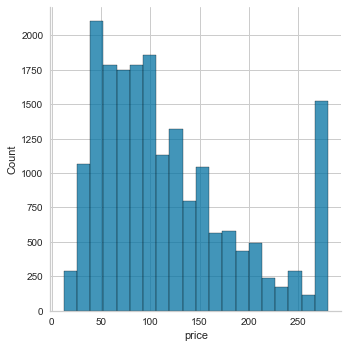

In [ ]:
sns.displot(df, x="price", bins =20)


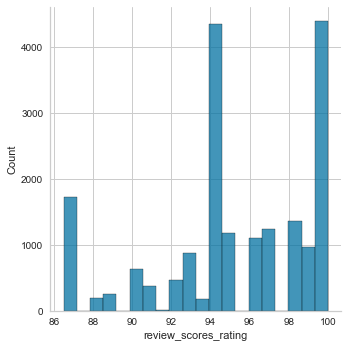

In [ ]:
sns.displot(df, x="review_scores_rating", bins =20)

# **Implementing Standard Linear Regression and Machine Learning Linear Regression**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19343 entries, 0 to 19342
Data columns (total 40 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   longitude                                     19343 non-null  float64
 1   latitude                                      19343 non-null  float64
 2   bedrooms                                      19343 non-null  float64
 3   beds                                          19343 non-null  float64
 4   host_total_listings_count                     19343 non-null  float64
 5   review_scores_rating                          19343 non-null  float64
 6   review_scores_accuracy                        19343 non-null  float64
 7   review_scores_cleanliness                     19343 non-null  float64
 8   review_scores_checkin                         19343 non-null  float64
 9   review_scores_communication                   19343 non-null 

In [ ]:
#Drop host_since, host_since_year, host_response_rate; these three variables are redundant and host_response rate has all 100 as response rate
df=df.drop(['host_since','host_since_year','host_response_rate'],axis=1)

In [ ]:
#Import necessary libraries for performing prediction
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
#Dummy coding categorical variables
#https://medium.com/analytics-vidhya/implementing-linear-regression-using-sklearn-76264a3c073c
X = pd.get_dummies(df, drop_first=True)
X.head(5)


,longitude,latitude,bedrooms,beds,host_total_listings_count,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,accommodates,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_acceptance_rate,host_length,instant_bookable_t,former_city_Etobicoke,former_city_North York,former_city_Old City of Toronto,former_city_Scarborough,former_city_York,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_t,labels_host_acceptance_rate_Strict,labels_host_acceptance_rate_Very Accepting,labels_host_acceptance_rate_Very strict
0,-79.42451,43.64617,3.5,3.5,1.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.11,7,280.5,4,730,0,0,0,0,7,0,0,1,1,0,0,100,13,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,-79.42709,43.64776,3.0,3.5,1.0,100.0,10.0,9.0,10.0,10.0,10.0,8.0,0.05,4,180.0,3,7,0,0,0,0,5,0,0,1,1,0,0,100,10,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
2,-79.43202,43.64887,2.0,2.0,3.0,98.0,10.0,9.0,10.0,10.0,10.0,10.0,1.19,5,151.0,3,60,0,0,0,0,68,2,0,3,3,0,0,100,9,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0
3,-79.43274,43.65132,1.0,1.0,2.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0.36,2,45.0,2,22,0,0,0,0,34,0,0,2,1,1,0,100,9,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0
4,-79.43240,43.65188,2.0,2.0,2.0,90.0,10.0,10.0,10.0,10.0,10.0,10.0,1.34,4,99.0,3,21,0,0,0,0,68,3,0,2,1,1,0,100,9,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0


In [ ]:
df1=X
#X1=X

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19343 entries, 0 to 19342
Data columns (total 46 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   longitude                                     19343 non-null  float64
 1   latitude                                      19343 non-null  float64
 2   bedrooms                                      19343 non-null  float64
 3   beds                                          19343 non-null  float64
 4   host_total_listings_count                     19343 non-null  float64
 5   review_scores_rating                          19343 non-null  float64
 6   review_scores_accuracy                        19343 non-null  float64
 7   review_scores_cleanliness                     19343 non-null  float64
 8   review_scores_checkin                         19343 non-null  float64
 9   review_scores_communication                   19343 non-null 

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19343 entries, 0 to 19342
Data columns (total 46 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   longitude                                     19343 non-null  float64
 1   latitude                                      19343 non-null  float64
 2   bedrooms                                      19343 non-null  float64
 3   beds                                          19343 non-null  float64
 4   host_total_listings_count                     19343 non-null  float64
 5   review_scores_rating                          19343 non-null  float64
 6   review_scores_accuracy                        19343 non-null  float64
 7   review_scores_cleanliness                     19343 non-null  float64
 8   review_scores_checkin                         19343 non-null  float64
 9   review_scores_communication                   19343 non-null 

In [ ]:

#As all categorical variables were coded numerically as 0 and 1, transformation of categorical data to numeric is not necessary

#Model Building
#Investigate relationship of variables to price in linear regression with measure of strength of prediction being R2
#Start with linear regression
#Then multiple regression

#With only sqft of living space as predictive feature, R square value was 0.49
dfa = df[['accommodates']]
Y = df['price']
lm1 = LinearRegression()
lm1.fit(X, Y)

#print("The predicted values are : " + str(lm1.predict(X)))

print("The R^2 value for the linear regression model is : " + str(lm1.score(X, Y)))

The R^2 value for the linear regression model is : 1.0


In [ ]:
#With additional features, the R2 value increased to 0.66
features = ['review_scores_rating', 'accommodates', 'bedrooms', 'beds', 'availability_30','number_of_reviews','reviews_per_month','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms'] 

Y = df['price']
lm2 = LinearRegression()
lm2.fit(df[features], Y)

#print("The predicted values are mentioned as : " + str(lm2.predict(Housingdata[features])))

print("The R^2 value is : " + str(lm2.score(df[features], Y)))

The R^2 value is : 0.4564478464233924


In [ ]:
X2 = X

In [ ]:
import statsmodels.api as sm
model = sm.OLS.from_formula("price ~ accommodates + beds + bedrooms + host_length +host_acceptance_rate+host_is_superhost_t+review_scores_rating",data = X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     1734.
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:51:53   Log-Likelihood:            -1.0518e+05
No. Observations:               19343   AIC:                         2.104e+05
Df Residuals:                   19335   BIC:                         2.104e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -131.5428     10.666    -12.333      0.000    -152.449    -110.636
accommodates            20.3376      0.439     46.348      0.000      19.478      21.198
beds                    -4.1667      0.885     -4.708      0.000      -5.902      -2.432
bedrooms                23.1849      1.035     22.394      0.000      21.156      25.214
host_length              2.0691      0.168     12.322      0.000       1.740       2.398
host_acceptance_rate     0.2745      0.043      6.349      0.000       0.190       0.359
host_is_superhost_t     -4.0656      0.922     -4.408      0.000      -5.874      -2.258
review_scores_rating     1.3496      0.104     13.038      0.000       1.147       1.552
==============================================================================
Omnibus:                     2938.716   Durbin-Watson:                   1.563
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5053.505
Skew:                           1.003   Prob(JB):                         0.00
Kurtosis:                       4.499   Cond. No.                     3.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#For standard multiple regression
#Note the coefficent how large it is
import statsmodels.api as sm
y = df['price']
X1=X.drop(['price'], axis = 1)
X1 = sm.add_constant(X1)
model = sm.OLS(y, X1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     509.3
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:51:54   Log-Likelihood:            -1.0255e+05
No. Observations:               19343   AIC:                         2.052e+05
Df Residuals:                   19299   BIC:                         2.055e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                         1.663e+04   1059.930     15.688      0.000    1.46e+04    1.87e+04
longitude                                       82.3151      9.308      8.844      0.000      64.071     100.559
latitude                                      -233.2391     15.835    -14.729      0.000    -264.277    -202.201
bedrooms                                        29.1728      0.931     31.343      0.000      27.348      30.997
beds                                            -3.4195      0.779     -4.387      0.000      -4.947      -1.892
host_total_listings_count                        1.8417      0.278      6.631      0.000       1.297       2.386
review_scores_rating                             1.2362      0.145      8.551      0.000       0.953       1.520
review_scores_accuracy                           1.1270      1.394      0.808      0.419      -1.606       3.860
review_scores_cleanliness                        4.7269      0.744      6.356      0.000       3.269       6.185
review_scores_checkin                          -12.3456      1.990     -6.204      0.000     -16.246      -8.445
review_scores_communication                     -2.9191      2.289     -1.275      0.202      -7.407       1.568
review_scores_location                          13.6364      1.522      8.960      0.000      10.653      16.620
review_scores_value                             -5.7392      0.808     -7.100      0.000      -7.324      -4.155
reviews_per_month                                2.2493      0.647      3.476      0.001       0.981       3.518
accommodates                                    11.4470      0.423     27.082      0.000      10.618      12.275
minimum_nights                                  -1.3657      0.104    -13.180      0.000      -1.569      -1.163
maximum_nights                                   0.0030      0.001      4.383      0.000       0.002       0.004
availability_30                                  1.3738      0.111     12.358      0.000       1.156       1.592
availability_60                                 -0.4711      0.123     -3.843      0.000      -0.711      -0.231
availability_90                                  0.1278      0.060      2.125      0.034       0.010       0.246
availability_365                                 0.0180      0.004      4.824      0.000       0.011       0.025
number_of_reviews                               -0.1034      0.025     -4.064      0.000      -0.153      -0.054
number_of_reviews_ltm                           -1.5627      0.104    -15.000      0.000      -1.767      -1.359
number_of_reviews_l30d                        6.415e-14   6.06e-15     10.578      0.000    5.23e-14     7.6e-14
calculated_host_listings_count  

In [ ]:
#For standard multiple regression
#Note the coefficent how large it is
import statsmodels.api as sm
y1 = df1['review_scores_rating']
X3= X2.drop(['review_scores_rating'], axis = 1)
X3 = sm.add_constant(X3)
model = sm.OLS(y1, X3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     review_scores_rating   R-squared:                       0.644
Model:                              OLS   Adj. R-squared:                  0.643
Method:                   Least Squares   F-statistic:                     811.1
Date:                  Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                          21:51:54   Log-Likelihood:                -44489.
No. Observations:                 19343   AIC:                         8.907e+04
Df Residuals:                     19299   BIC:                         8.941e+04
Df Model:                            43                                         
Covariance Type:              nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                          106.4247     53.004      2.008      0.045       2.531     210.318
longitude                                        0.3017      0.463      0.651      0.515      -0.607       1.210
latitude                                        -2.1074      0.791     -2.664      0.008      -3.658      -0.557
bedrooms                                        -0.0135      0.047     -0.284      0.777      -0.106       0.079
beds                                             0.0036      0.039      0.094      0.925      -0.072       0.080
host_total_listings_count                       -0.0386      0.014     -2.797      0.005      -0.066      -0.012
review_scores_accuracy                           2.5273      0.067     37.797      0.000       2.396       2.658
review_scores_cleanliness                        1.7785      0.035     51.237      0.000       1.710       1.847
review_scores_checkin                            1.2208      0.099     12.381      0.000       1.028       1.414
review_scores_communication                      2.6206      0.112     23.355      0.000       2.401       2.841
review_scores_location                           1.0985      0.075     14.573      0.000       0.951       1.246
review_scores_value                              1.5260      0.039     39.437      0.000       1.450       1.602
reviews_per_month                               -0.0560      0.032     -1.742      0.082      -0.119       0.007
accommodates                                    -0.0337      0.021     -1.574      0.116      -0.076       0.008
price                                            0.0031      0.000      8.551      0.000       0.002       0.004
minimum_nights                                   0.0188      0.005      3.638      0.000       0.009       0.029
maximum_nights                               -4.446e-05   3.41e-05     -1.304      0.192      -0.000    2.23e-05
availability_30                                  0.0039      0.006      0.694      0.488      -0.007       0.015
availability_60                                 -0.0064      0.006     -1.055      0.292      -0.018       0.006
availability_90                                  0.0038      0.003      1.259      0.208      -0.002       0.010
availability_365                               2.44e-05      0.000      0.131      0.895      -0.000       0.000
number_of_reviews                               -0.0165      0.001    -13.092      0.000      -0.019      -0.014
number_of_reviews_ltm                           -0.0027      0.005     -0.527      0.598      -0.013       0.007
number_of_reviews_l30d                        1.028e-15   4.88e-16      2.106      0.035    7.12e-17    1.99e-15
calculated

# **LINEAR REGRESSION MODELLING AND MODEL EVALUATION**
Split with 80%, 70%, 50% on training set and see effect on Model evaluation metrics RMSE and so forth
Targets being Price and Review Score Rating 

## **Implementing Machine learning: Linear Regression with Price**

In [ ]:
#Fitting Machine Learning Model in this case being Linear regression
X = X.drop('price',axis=1)
#X = df2[features]
y = df['price']

#import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#Create the training and the test set
#In this case, 70% of data allocated to training set
xtrain, xtest, ytrain, ytest = train_test_split(X,y,train_size=0.70,random_state=42)

xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

#Create the regressor
lm2 = LinearRegression()
lm2.fit(xtrain, ytrain)

predicted = lm2.predict(xtest)

#MODEL EVALUATION
from sklearn.metrics import adjusted_rand_score, r2_score, mean_squared_error, mean_absolute_error
print("R2 (explained variance):", round(r2_score(ytest, predicted), 2))
print("Mean Absolute Prediction Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((ytest-predicted)/predicted)), 2))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(mean_absolute_error(ytest, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(ytest, predicted))))

theta_1 = lm2.coef_[0]
theta_0 = lm2.intercept_
print(' y = {0} + x * {1}'.format(theta_0, theta_1))

R2 (explained variance): 0.53
Mean Absolute Prediction Error (Σ(|y-pred|/y)/n): 0.39
Mean Absolute Error (Σ|y-pred|/n): 36
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 48
 y = 16770.51990336948 + x * 81.53415644396586


In [ ]:
#To compare the actual oputput values of cr_x_test with predicted values
ytest_predict = lm2.predict(xtest)
df = pd.DataFrame({'Actual':ytest, 'Predicted':ytest_predict})
df

,Actual,Predicted
7341,89.0,119.214568
12888,210.0,179.446454
14221,95.0,100.590931
1027,120.0,142.738774
2255,95.0,114.213735
...,...,...
8242,45.0,67.710968
14912,85.0,84.728590
13433,105.0,121.013065
14866,159.0,109.894237


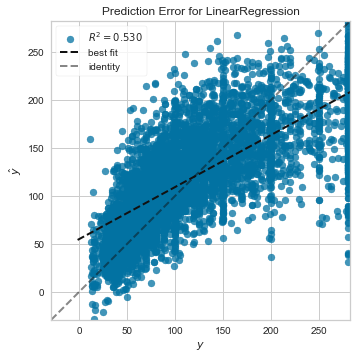

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
# Instantiate the linear model and visualizer
from yellowbrick.regressor import PredictionError
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(xtrain, ytrain)  # Fit the training data to the visualizer
visualizer.score(xtest, ytest)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

(-500.0, 1700.0)

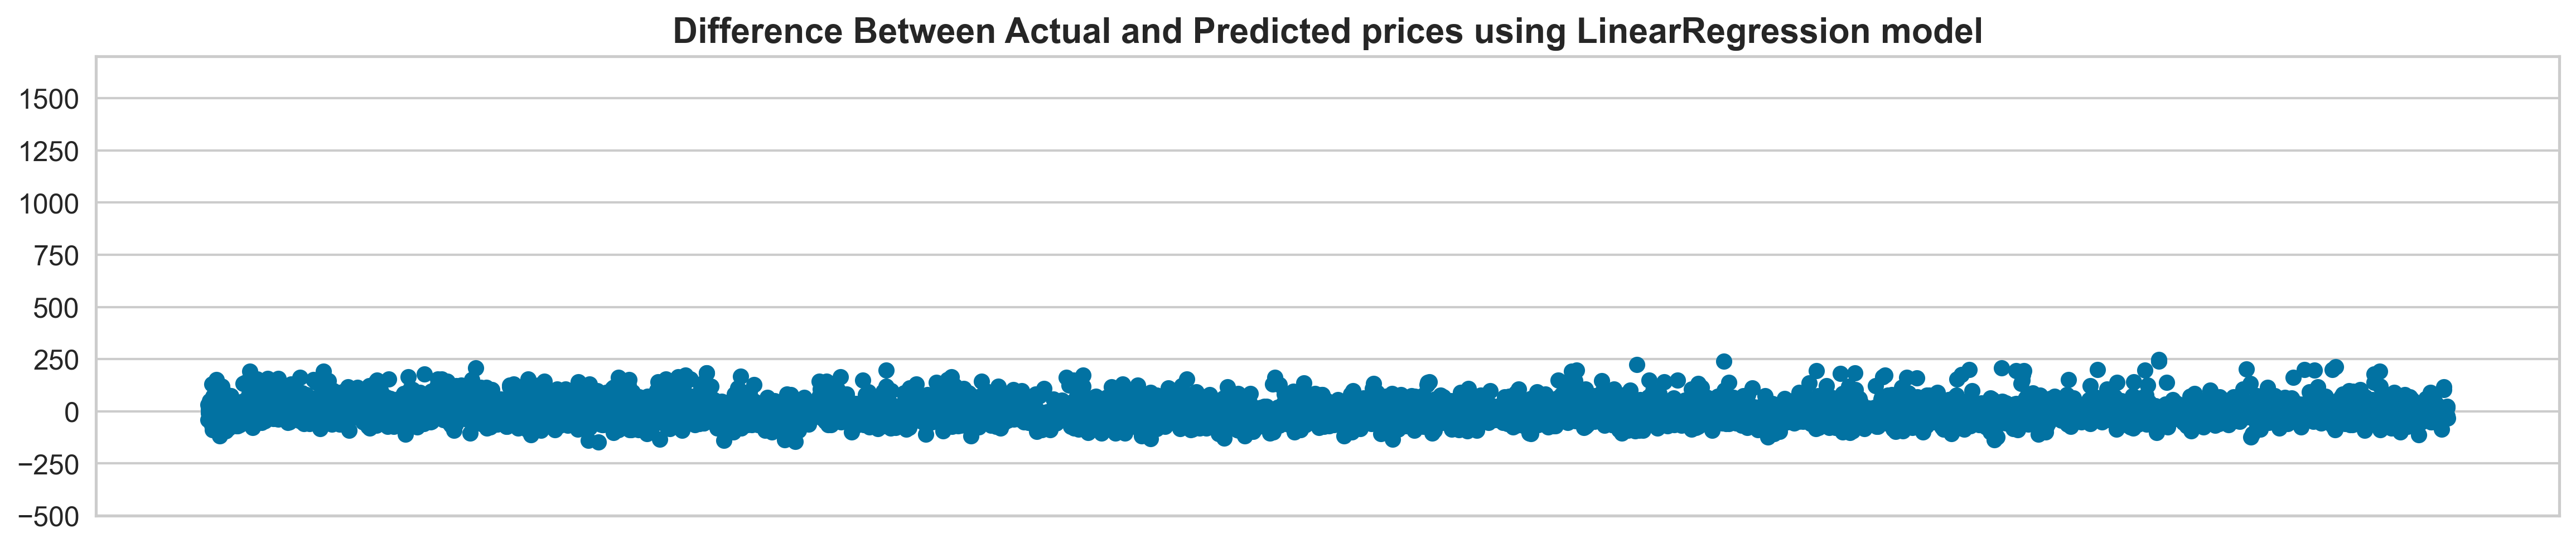

In [ ]:
#Way to plot the predictions against actual to look at the difference?
#predictions = model.predict(xtest)
#sns.regplot(ytest,predictions)
plt.figure(figsize=(19, 8), dpi=300)
plt.subplot(2,1,1)
#plt.plot(y_test - lm_test_pred, marker='o',linestyle='', color =base)
plt.plot(ytest - ytest_predict, marker='o',linestyle='')
#plt.ylabel('Actual and Pred Price Difference-LM Model');
plt.title("Difference Between Actual and Predicted prices using LinearRegression model", fontsize = 15, weight = 'bold')
plt.yticks(fontsize = 12)
plt.xticks([])
plt.ylim(-500, 1700)

In [ ]:
##Create the training and the test set
##In this case, 80% of data allocated to training set
xtrain, xtest, ytrain, ytest = train_test_split(X,y,train_size=0.80,random_state=42)

xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

#Create the regressor
lm2 = LinearRegression()
lm2.fit(xtrain, ytrain)

predicted = lm2.predict(xtest)

#MODEL EVALUATION
print("R2 (explained variance):", round(r2_score(ytest, predicted), 2))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((ytest-predicted)/predicted)), 2))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(mean_absolute_error(ytest, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(ytest, predicted))))
print(' y = {0} + x * {1}'.format(theta_0, theta_1))

R2 (explained variance): 0.52
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.37
Mean Absolute Error (Σ|y-pred|/n): 36
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 48
 y = 16770.51990336948 + x * 81.53415644396586


In [ ]:
#To compare the actual oputput values of cr_x_test with predicted values
#cr_y_test_predict = lm.predict(cr_x_test)
#df = pd.DataFrame({'Actual':cr_y_test, 'Predicted':cr_y_test_predict})
#df

ytest_predict = lm2.predict(xtest)
df = pd.DataFrame({'Actual':ytest, 'Predicted':ytest_predict})
df

,Actual,Predicted
7341,89.0,117.155185
12888,210.0,178.632897
14221,95.0,100.665670
1027,120.0,141.272028
2255,95.0,113.090640
...,...,...
7547,250.0,234.263550
14505,61.0,79.614434
7628,86.0,92.899780
9262,77.0,116.406457


(-500.0, 1700.0)

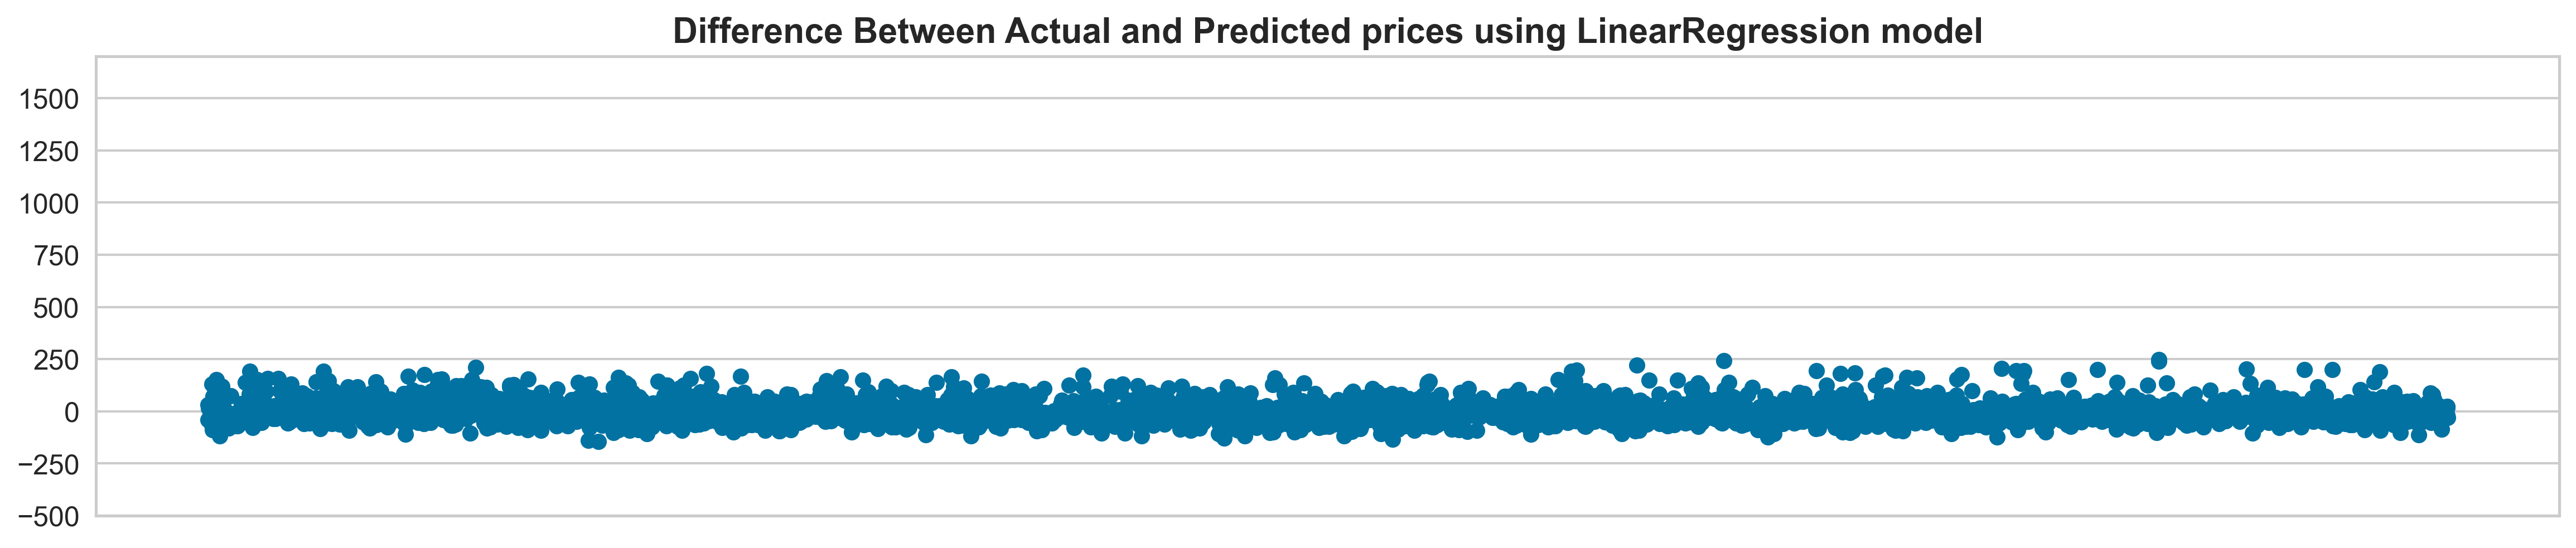

In [ ]:
#Way to plot the predictions against actual to look at the difference?
#predictions = model.predict(xtest)
#sns.regplot(ytest,predictions)
plt.figure(figsize=(19, 8), dpi=300)
plt.subplot(2,1,1)
#plt.plot(y_test - lm_test_pred, marker='o',linestyle='', color =base)
plt.plot(ytest - ytest_predict, marker='o',linestyle='')
#plt.ylabel('Actual and Pred Price Difference-LM Model');
plt.title("Difference Between Actual and Predicted prices using LinearRegression model", fontsize = 15, weight = 'bold')
plt.yticks(fontsize = 12)
plt.xticks([])
plt.ylim(-500, 1700)

<AxesSubplot:xlabel='price'>

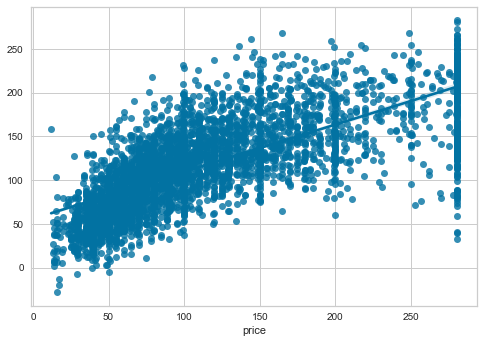

In [ ]:
sns.regplot(ytest,ytest_predict)

# **Implementing Machine Learning: Random Forest Regression**

In [ ]:
##Create the training and the test set
##In this case, 70% of data allocated to training set
xtrain, xtest, ytrain, ytest = train_test_split(X,y,train_size=0.70,random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

#Create a RandomForestRegressor model to predict the prices
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)    
rf_model.fit(xtrain, ytrain)
rf_pred = rf_model.predict(xtest)

# Predict the listing prices using the RandomForestRegressor model
rf_train_pred = rf_model.predict(xtrain)
rf_test_pred = rf_model.predict(xtest)

In [ ]:
#Evaluate our model using the sklear metrices like r2_score and mean_absolute_error
import math
rf_train_score = r2_score(ytrain, rf_train_pred)
rf_test_score = r2_score(ytest, rf_test_pred)

print("R2 (explained variance):", round(r2_score(ytest, rf_pred), 2))

rf_mse= mean_squared_error(ytest, rf_test_pred)
print("RandomForest Regressor MSE is: {}.".format(rf_mse))

rf_mae = mean_absolute_error(ytest, rf_test_pred)
print("RandomForest Regressor MAE is: {}.".format(rf_mae))

rf_rmse = math.sqrt(rf_mse)
print("RandomForest Regressor RMSE is: {}.".format(rf_rmse))

R2 (explained variance): 0.6
RandomForest Regressor MSE is: 1957.5054863394244.
RandomForest Regressor MAE is: 31.661670549715666.
RandomForest Regressor RMSE is: 44.24370561265663.


## **Implementing Machine learning: Linear Regression with Review ratings score**

In [ ]:
#Linear Regression with Review Ratings score as Target variable

#Fitting Machine Learning Model in this case being Linear regression
X3 = X1.drop('review_scores_rating',axis=1)
#X = df2[features]
y3 = df1['review_scores_rating']

#import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#Create the training and the test set
#In this case, 70% of data allocated to training set
xtrain, xtest, ytrain, ytest = train_test_split(X3,y3,train_size=0.70,random_state=42)

xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

#Create the regressor
lm2 = LinearRegression()
lm2.fit(xtrain, ytrain)

predicted = lm2.predict(xtest)

#MODEL EVALUATION
from sklearn.metrics import adjusted_rand_score, r2_score, mean_squared_error, mean_absolute_error
print("R2 (explained variance):", round(r2_score(ytest, predicted), 2))
print("Mean Absolute Prediction Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((ytest-predicted)/predicted)), 2))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(mean_absolute_error(ytest, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(ytest, predicted))))

theta_1 = lm2.coef_[0]
theta_0 = lm2.intercept_
print(' y = {0} + x * {1}'.format(theta_0, theta_1))

R2 (explained variance): 0.64
Mean Absolute Prediction Error (Σ(|y-pred|/y)/n): 0.02
Mean Absolute Error (Σ|y-pred|/n): 2
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 2
 y = 183.66782964664574 + x * -3.5880791727097555e-14


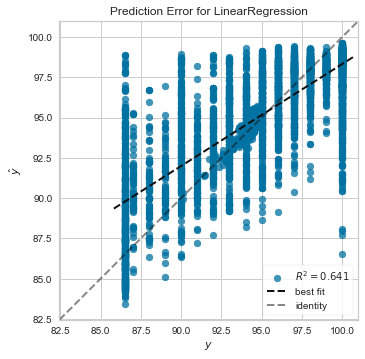

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
# Instantiate the linear model and visualizer
from yellowbrick.regressor import PredictionError
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(xtrain, ytrain)  # Fit the training data to the visualizer
visualizer.score(xtest, ytest)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [ ]:
#To compare the actual oputput values of cr_x_test with predicted values
ytest_predict = lm2.predict(xtest)
df = pd.DataFrame({'Actual':ytest, 'Predicted':ytest_predict})
df

,Actual,Predicted
7341,93.000000,94.887420
12888,100.000000,98.677014
14221,95.000000,98.399833
1027,98.000000,96.226776
2255,94.415863,94.565174
...,...,...
8242,94.000000,93.116308
14912,90.000000,89.237108
13433,86.500000,95.659155
14866,94.000000,94.832709


# **Implementing Machine Learning: Random Forest Regression**

In [ ]:
##Create the training and the test set
##In this case, 70% of data allocated to training set
xtrain, xtest, ytrain, ytest = train_test_split(X3,y3,train_size=0.70,random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

#Create a RandomForestRegressor model to predict the prices
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)    
rf_model.fit(xtrain, ytrain)
rf_pred = rf_model.predict(xtest)

# Predict the listing prices using the RandomForestRegressor model
rf_train_pred = rf_model.predict(xtrain)
rf_test_pred = rf_model.predict(xtest)

In [ ]:
#Evaluate our model using the sklear metrices like r2_score and mean_absolute_error
import math
rf_train_score = r2_score(ytrain, rf_train_pred)
rf_test_score = r2_score(ytest, rf_test_pred)

print("R2 (explained variance):", round(r2_score(ytest, rf_pred), 2))

rf_mse= mean_squared_error(ytest, rf_test_pred)
print("RandomForest Regressor MSE is: {}.".format(rf_mse))

rf_mae = mean_absolute_error(ytest, rf_test_pred)
print("RandomForest Regressor MAE is: {}.".format(rf_mae))

rf_rmse = math.sqrt(rf_mse)
print("RandomForest Regressor RMSE is: {}.".format(rf_rmse))

R2 (explained variance): 0.65
RandomForest Regressor MSE is: 5.941974852378349.
RandomForest Regressor MAE is: 1.4869528739468227.
RandomForest Regressor RMSE is: 2.437616633594862.


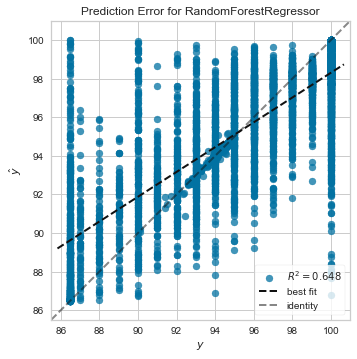

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
# Instantiate the linear model and visualizer
from yellowbrick.regressor import PredictionError
model = RandomForestRegressor()
visualizer = PredictionError(model)

visualizer.fit(xtrain, ytrain)  # Fit the training data to the visualizer
visualizer.score(xtest, ytest)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

## **Implementing Machine Learning: Light Gradient Booster**

In [ ]:
from pycaret.regression import *
s = setup(df2, target = 'price', session_id = 123, train_size = 0.7)

,Description,Value
0,session_id,123
1,Target,price
2,Original Data,"(19343, 40)"
3,Missing Values,False
4,Numeric Features,20
5,Categorical Features,18
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(13540, 129)"


In [ ]:
#We are looking for a range of values to report for price, so RMSE would be the best metric to sort by.
compare_models(sort = 'RMSE')
#A lgbm model appears to have the lowest rmse, as well as being the best for every other metric.

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,31.4060,1929.9485,43.9074,0.6199,0.3567,0.3129,0.0620
rf,Random Forest Regressor,32.2055,2027.4467,45.0038,0.6006,0.3645,0.3223,1.2950
gbr,Gradient Boosting Regressor,33.3540,2108.1634,45.8943,0.5848,0.3776,0.3377,0.4150
et,Extra Trees Regressor,32.5954,2165.4108,46.5085,0.5735,0.3744,0.3250,1.5830
lr,Linear Regression,36.0115,2366.6580,48.6258,0.5340,0.4371,0.3769,0.3950
ridge,Ridge Regression,35.9928,2367.1384,48.6306,0.5339,0.4337,0.3761,0.0190
br,Bayesian Ridge,36.0759,2382.4473,48.7876,0.5309,0.4300,0.3757,0.1100
omp,Orthogonal Matching Pursuit,36.8443,2497.4200,49.9512,0.5083,0.4290,0.3869,0.2570
lasso,Lasso Regression,37.5344,2563.1525,50.6071,0.4954,0.4301,0.3998,0.8150
en,Elastic Net,41.0248,2878.7650,53.6444,0.4332,0.4714,0.4715,0.0940


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
#Creating a model for score using lGBM
#Making 10 iterations and choosing the best scoring model.
price_model = create_model('lightgbm', fold = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,31.8590,1985.0409,44.5538,0.6140,0.3517,0.3073
1,30.6679,1822.9177,42.6956,0.6439,0.3446,0.3026
2,29.3134,1688.4623,41.0909,0.6750,0.3398,0.2954
3,31.9212,2003.7859,44.7637,0.6146,0.3567,0.3101
4,31.3446,1950.6029,44.1656,0.6235,0.3548,0.3058
5,32.6895,2121.5910,46.0607,0.5937,0.3751,0.3287
6,32.5593,2088.8907,45.7044,0.5822,0.3631,0.3232
7,31.7084,1948.3915,44.1406,0.6022,0.3690,0.3219
8,31.0981,1889.2625,43.4656,0.6071,0.3625,0.3229
9,30.8985,1800.5397,42.4328,0.6429,0.3502,0.3108


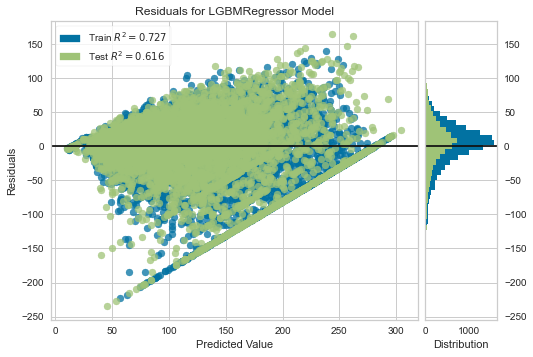

In [ ]:
#Plot of the price model
#Distribution is OK, test r2 is a lower than train set. 
#We are looking at RMSE however, so this isn't a complete loss.
plot_model(price_model)

In [ ]:
#Evaluating the model
#The location appears to be the most important features, likely due to what attractions they are
#close to, and the pricing of the neighbourhood. The number of reviews and their rating directly impacts
#the price, meaning getting as many good reviews is essential to maximizing profit. Beyond that
#availability and the maximum number of nights allowed could be due to 'long term' renters, more research
#may be needed. Finally total listings count is likely due to those with high listings being hotels or other
#corporate entities, which are able to charge a premium for established consistent service.
evaluate_model(price_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
#Model has a range of ~43 dollars, meaning we can give customers a range of that amount to determine what
#they should charge based on their provided information.
predict_model(price_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,31.0751,1892.7818,43.5061,0.6156,0.3564,0.3113


,longitude,latitude,bedrooms,beds,host_total_listings_count,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,...,host_since_weekday_1,host_since_weekday_2,host_since_weekday_3,host_since_weekday_4,host_since_weekday_5,host_since_weekday_6,host_since_is_month_end_1,host_since_is_month_start_0,price,Label
0,-79.312950,43.688412,1.0,1.0,4.0,100.000000,10.000000,10.000000,10.000000,10.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,65.000000,81.878565
1,-79.393112,43.712120,2.0,1.0,1.0,94.632263,9.648602,9.382244,9.788221,9.791734,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,60.000000,83.283703
2,-79.401131,43.666100,1.0,1.0,1.0,95.000000,10.000000,9.000000,10.000000,10.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,60.000000,69.110613
3,-79.402611,43.704578,1.0,2.0,3.0,95.000000,10.000000,10.000000,10.000000,10.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,84.000000,97.309383
4,-79.326576,43.681271,1.0,1.0,2.0,94.000000,10.000000,9.000000,10.000000,10.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,250.000000,87.010226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5798,-79.320900,43.664822,1.0,1.0,2.0,92.000000,10.000000,9.000000,10.000000,10.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,27.000000,46.430912
5799,-79.593948,43.734409,1.0,1.0,2.0,94.415863,9.647837,9.409267,9.740917,9.753335,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,25.000000,103.739737
5800,-79.400093,43.641312,2.0,3.0,1.0,94.000000,10.000000,9.000000,10.000000,10.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,141.860001,171.837730
5801,-79.416138,43.656342,1.0,1.0,2.0,99.000000,10.000000,10.000000,10.000000,10.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,90.000000,64.510426


In [ ]:
#Finalizing the model for deployment
finalize_model(price_model)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
#Saving the model for future use
save_model(price_model, 'P3_Price_Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                  

In [ ]:
#Continuing, we will do the same for review scores.
s = setup(data, target = 'review_scores_rating', 
          session_id = 123, train_size = 0.7)

,Description,Value
0,session_id,123
1,Target,review_scores_rating
2,Original Data,"(19343, 40)"
3,Missing Values,False
4,Numeric Features,20
5,Categorical Features,18
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(13540, 129)"


In [ ]:
#We are looking to explain what reasons are most important in determining a review score.
#The actually score is less important than the accuracy, so we will be using r2 for this set.
compare_models(sort = 'r2')
#A gbr model appears to have the best overall, so we will use that.

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.4718,5.5544,2.3551,0.6627,0.0248,0.0156,0.4280
lightgbm,Light Gradient Boosting Machine,1.4543,5.6000,2.3648,0.6599,0.0249,0.0154,0.0490
br,Bayesian Ridge,1.6357,5.8661,2.4207,0.6437,0.0255,0.0174,0.1080
ridge,Ridge Regression,1.6354,5.8700,2.4215,0.6435,0.0256,0.0174,0.0190
lr,Linear Regression,1.6356,5.8706,2.4216,0.6434,0.0256,0.0174,0.0320
omp,Orthogonal Matching Pursuit,1.6158,5.8721,2.4220,0.6433,0.0256,0.0172,0.2370
rf,Random Forest Regressor,1.4686,5.8923,2.4258,0.6420,0.0256,0.0156,1.3880
et,Extra Trees Regressor,1.5153,6.6061,2.5680,0.5986,0.0271,0.0161,1.5470
ada,AdaBoost Regressor,2.0287,7.7024,2.7744,0.5319,0.0291,0.0214,0.2430
en,Elastic Net,2.5643,10.4956,3.2389,0.3625,0.0342,0.0272,0.0270


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
#Creating a model for score using GBR
#Making 10 iterations and choosing the best scoring model.
score_model = create_model('gbr', fold = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.4320,5.0629,2.2501,0.6914,0.0237,0.0152
1,1.4260,5.1476,2.2688,0.6817,0.0239,0.0151
2,1.4616,5.6728,2.3818,0.6729,0.0251,0.0155
3,1.5416,6.0749,2.4647,0.6238,0.0260,0.0164
4,1.5368,6.1902,2.4880,0.6323,0.0263,0.0164
5,1.4053,5.0455,2.2462,0.6838,0.0236,0.0149
6,1.4861,5.6047,2.3674,0.6567,0.0250,0.0158
7,1.5466,5.8707,2.4229,0.6534,0.0256,0.0165
8,1.4489,5.7951,2.4073,0.6569,0.0254,0.0154
9,1.4334,5.0800,2.2539,0.6739,0.0238,0.0152


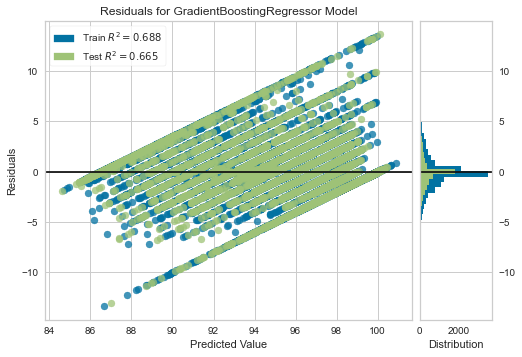

In [ ]:
#Plotting the score model
#Test set isn't too far off from the train set
#Residuals aren't too excessive and the distribution of the test/train are similar.
plot_model(score_model)

In [ ]:
#Evaluating the model
#The accuracy of a listing and its location have the highest importance in our model.
#This would indicate that customers value the area being to their liking (safety, accessibility, crime levels)
#as well as the listing meeting their expectations after their stay. This is further corraborated by the
#checkin score also being moderately important. It should also be noted that the number of reviews could be
#another factor, more analysis may be required.
evaluate_model(score_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
#Comparing a prediction of the model to the original set, it is
#within expected ranges. As review score does impact price, we can use the above
#findings to give suggestions on how new listings can price themselves and maximize
#their listing price.
predict_model(score_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,1.4435,5.3940,2.3225,0.6648,0.0245,0.0154


,longitude,latitude,bedrooms,beds,host_total_listings_count,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,...,host_since_weekday_1,host_since_weekday_2,host_since_weekday_3,host_since_weekday_4,host_since_weekday_5,host_since_weekday_6,host_since_is_month_end_1,host_since_is_month_start_0,review_scores_rating,Label
0,-79.312950,43.688412,1.0,1.0,4.0,10.000000,10.000000,10.000000,10.000000,10.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,100.000000,98.377951
1,-79.393112,43.712120,2.0,1.0,1.0,9.648602,9.382244,9.788221,9.791734,9.697501,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,94.632263,94.610383
2,-79.401131,43.666100,1.0,1.0,1.0,10.000000,9.000000,10.000000,10.000000,10.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,95.000000,95.300629
3,-79.402611,43.704578,1.0,2.0,3.0,10.000000,10.000000,10.000000,10.000000,10.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,95.000000,96.365714
4,-79.326576,43.681271,1.0,1.0,2.0,10.000000,9.000000,10.000000,10.000000,10.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,94.000000,96.061026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5798,-79.320900,43.664822,1.0,1.0,2.0,10.000000,9.000000,10.000000,10.000000,10.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,92.000000,93.697824
5799,-79.593948,43.734409,1.0,1.0,2.0,9.647837,9.409267,9.740917,9.753335,9.708502,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,94.415863,94.326129
5800,-79.400093,43.641312,2.0,3.0,1.0,10.000000,9.000000,10.000000,10.000000,10.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,94.000000,95.769094
5801,-79.416138,43.656342,1.0,1.0,2.0,10.000000,10.000000,10.000000,10.000000,10.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,99.000000,98.150607


In [ ]:
#Finalizing the model for deployment
finalize_model(score_model)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
#Saving the model for future use in tableau
save_model(score_model, 'P3_Score_Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='review_scores_rating',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 num...
                                            learning_rate=0.1, loss='ls',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_de

In [ ]:
#price_model = load_model('P3_Price_Model')
#score_model = load_model('P3_Score_Model')